In [4]:
!pip install mlxtend

In [95]:
import pandas as pd
import mlxtend
from mlxtend.frequent_patterns import association_rules,apriori
import matplotlib.pyplot as plt

In [97]:
titanic=pd.read_csv("Titanic.csv")
titanic
                    


,Class,Gender,Age,Survived
0,3rd,Male,Child,No
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No
...,...,...,...,...
2196,Crew,Female,Adult,Yes
2197,Crew,Female,Adult,Yes
2198,Crew,Female,Adult,Yes
2199,Crew,Female,Adult,Yes


In [99]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Class     2201 non-null   object
 1   Gender    2201 non-null   object
 2   Age       2201 non-null   object
 3   Survived  2201 non-null   object
dtypes: object(4)
memory usage: 68.9+ KB


### there is no null values, data type is obj and we can do one hot encoding


<BarContainer object of 4 artists>

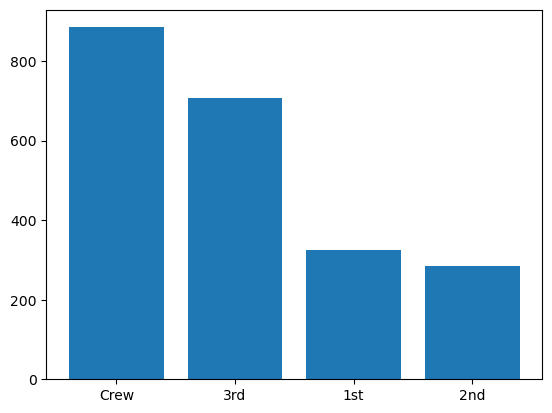

In [102]:
counts=titanic["Class"].value_counts()
plt.bar(counts.index,counts.values)

# crew passengers were high and 3rd class people were comparatively lowers than crew passengers


In [105]:
# perfrom encoing one hot encoding on the categorical colunns
df=pd.get_dummies(titanic,dtype=int)
df.head()


,Class_1st,Class_2nd,Class_3rd,Class_Crew,Gender_Female,Gender_Male,Age_Adult,Age_Child,Survived_No,Survived_Yes
0,0,0,1,0,0,1,0,1,1,0
1,0,0,1,0,0,1,0,1,1,0
2,0,0,1,0,0,1,0,1,1,0
3,0,0,1,0,0,1,0,1,1,0
4,0,0,1,0,0,1,0,1,1,0


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Class_1st      2201 non-null   int32
 1   Class_2nd      2201 non-null   int32
 2   Class_3rd      2201 non-null   int32
 3   Class_Crew     2201 non-null   int32
 4   Gender_Female  2201 non-null   int32
 5   Gender_Male    2201 non-null   int32
 6   Age_Adult      2201 non-null   int32
 7   Age_Child      2201 non-null   int32
 8   Survived_No    2201 non-null   int32
 9   Survived_Yes   2201 non-null   int32
dtypes: int32(10)
memory usage: 86.1 KB


In [109]:

frequent_itemsets= apriori(df, min_support=0.05,use_colnames=True,max_len=None)
frequent_itemsets

C:\Users\Danish\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.147660,(Class_1st)
1,0.129487,(Class_2nd)
2,0.320763,(Class_3rd)
3,0.402090,(Class_Crew)
4,0.213539,(Gender_Female)
...,...,...
58,0.053612,"(Age_Adult, Survived_No, Gender_Male, Class_1st)"
59,0.069968,"(Age_Adult, Survived_No, Gender_Male, Class_2nd)"
60,0.175829,"(Age_Adult, Survived_No, Gender_Male, Class_3rd)"
61,0.304407,"(Class_Crew, Survived_No, Gender_Male, Age_Adult)"


In [111]:
frequent_itemsets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   support   63 non-null     float64
 1   itemsets  63 non-null     object 
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


In [113]:
rules= association_rules(frequent_itemsets,metric='lift',min_threshold=1.0)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Gender_Female),(Class_1st),0.213539,0.147660,0.065879,0.308511,2.089329,1.0,0.034348,1.232615,0.662941,0.223077,0.188716,0.377332
1,(Class_1st),(Gender_Female),0.147660,0.213539,0.065879,0.446154,2.089329,1.0,0.034348,1.419998,0.611701,0.223077,0.295774,0.377332
2,(Age_Adult),(Class_1st),0.950477,0.147660,0.144934,0.152486,1.032680,1.0,0.004587,1.005694,0.639010,0.152050,0.005661,0.567012
3,(Class_1st),(Age_Adult),0.147660,0.950477,0.144934,0.981538,1.032680,1.0,0.004587,2.682493,0.037128,0.152050,0.627212,0.567012
4,(Survived_Yes),(Class_1st),0.323035,0.147660,0.092231,0.285513,1.933584,1.0,0.044531,1.192940,0.713221,0.243697,0.161735,0.455064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,"(Age_Adult, Gender_Male)","(Class_Crew, Survived_Yes)",0.757383,0.096320,0.087233,0.115177,1.195776,1.0,0.014282,1.021312,0.674821,0.113811,0.020867,0.510419
160,"(Survived_Yes, Gender_Male)","(Class_Crew, Age_Adult)",0.166742,0.402090,0.087233,0.523161,1.301104,1.0,0.020188,1.253903,0.277731,0.181132,0.202490,0.370055
161,(Class_Crew),"(Age_Adult, Survived_Yes, Gender_Male)",0.402090,0.153567,0.087233,0.216949,1.412737,1.0,0.025486,1.080943,0.488626,0.186227,0.074882,0.392498
162,(Age_Adult),"(Class_Crew, Survived_Yes, Gender_Male)",0.950477,0.087233,0.087233,0.091778,1.052103,1.0,0.004320,1.005004,1.000000,0.091778,0.004980,0.545889


In [115]:
rules.sort_values(by='lift',ascending=False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
106,"(Age_Adult, Gender_Female)","(Survived_Yes, Class_1st)",0.193094,0.092231,0.063607,0.329412,3.571602,1.0,0.045798,1.353691,0.892314,0.286885,0.261279,0.509533
111,"(Survived_Yes, Class_1st)","(Age_Adult, Gender_Female)",0.092231,0.193094,0.063607,0.689655,3.571602,1.0,0.045798,2.600030,0.793168,0.286885,0.615389,0.509533
112,(Gender_Female),"(Age_Adult, Survived_Yes, Class_1st)",0.213539,0.089505,0.063607,0.297872,3.328005,1.0,0.044495,1.296766,0.889453,0.265655,0.228851,0.504266
105,"(Age_Adult, Survived_Yes, Class_1st)",(Gender_Female),0.089505,0.213539,0.063607,0.710660,3.328005,1.0,0.044495,2.718119,0.768285,0.265655,0.632098,0.504266
35,(Gender_Female),"(Survived_Yes, Class_1st)",0.213539,0.092231,0.064062,0.300000,3.252709,1.0,0.044367,1.296813,0.880609,0.265038,0.228879,0.497291
34,"(Survived_Yes, Class_1st)",(Gender_Female),0.092231,0.213539,0.064062,0.694581,3.252709,1.0,0.044367,2.575025,0.762930,0.265038,0.611654,0.497291
108,"(Gender_Female, Class_1st)","(Age_Adult, Survived_Yes)",0.065879,0.297138,0.063607,0.965517,3.249394,1.0,0.044032,20.383008,0.741071,0.212443,0.950940,0.589792
109,"(Age_Adult, Survived_Yes)","(Gender_Female, Class_1st)",0.297138,0.065879,0.063607,0.214067,3.249394,1.0,0.044032,1.188551,0.984902,0.212443,0.158639,0.589792
36,(Survived_Yes),"(Gender_Female, Class_1st)",0.323035,0.065879,0.064062,0.198312,3.010243,1.0,0.042781,1.165193,0.986463,0.197203,0.141773,0.585363
33,"(Gender_Female, Class_1st)",(Survived_Yes),0.065879,0.323035,0.064062,0.972414,3.010243,1.0,0.042781,24.539982,0.714898,0.197203,0.959250,0.585363


# concluions
- Adult females travelling in the first class survived the most

In [118]:

rules[['support','confidence','lift'].hist(figsize=(15,7))]
plt.show()

C:\Users\Danish\anaconda3\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
C:\Users\Danish\anaconda3\Lib\ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)
C:\Users\Danish\anaconda3\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
C:\Users\Danish\anaconda3\Lib\ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)


AttributeError: 'list' object has no attribute 'hist'